In [43]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [44]:
#read the file
df=pd.read_csv('baseball.csv',na_values='')
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [45]:
df.shape

(30, 17)

Dataset has 30 rows and 17 columns
Columns:

W -  Number of predicted wins

R -  Runs scored

AB - At Bats

H  - Hits

2B - Doubles

3B - Triples

HR - Homeruns

BB - Walks

SO - Strikeouts

SB - Stolenbases

RA - Runs Allowed

ER - Earned Runs

ERA - Earned Run Average

CG -  Complete Games

SHO - Shutouts

SV -  Saves

E  -  Errors

W is the target variable i.e Dependent variable

The rest 16 are independent columns


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


All the columns are int type except for ERA which is float. Observing the values of target column 'W', it can be seen that this is Regression problem

In [47]:
#Check if null values are present in the dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

It can be seen that there is no missing data.

# Data Visualisation

All the columns appear to be numerical data particularly discrete except for ERA which is continous numerical data.

Let us study the distibution of all columns

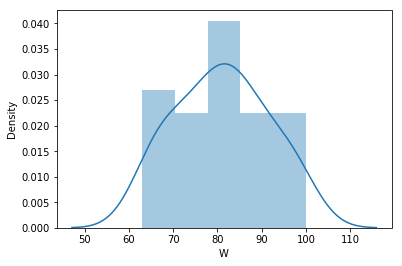

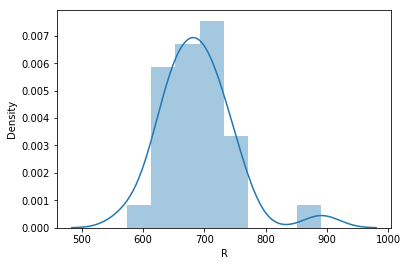

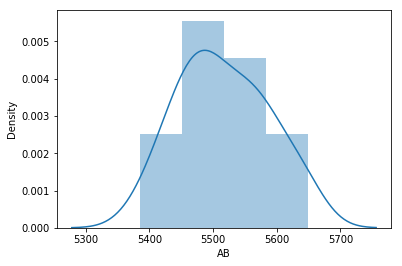

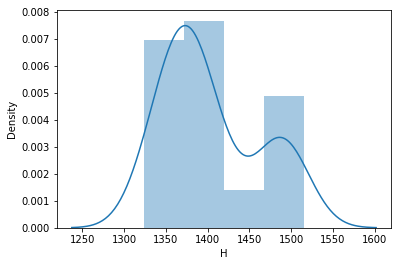

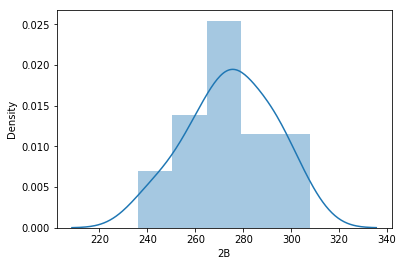

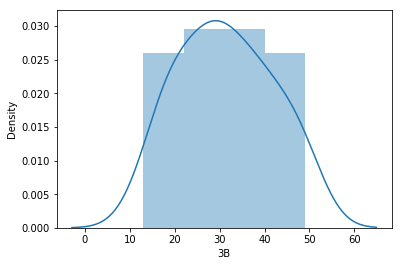

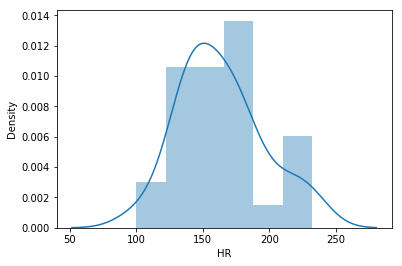

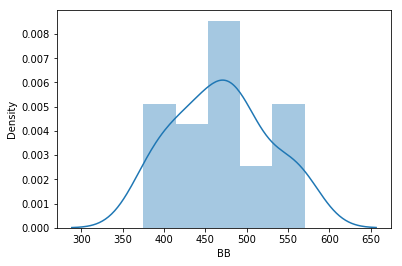

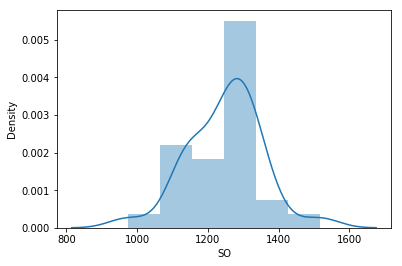

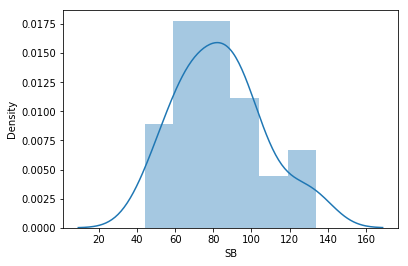

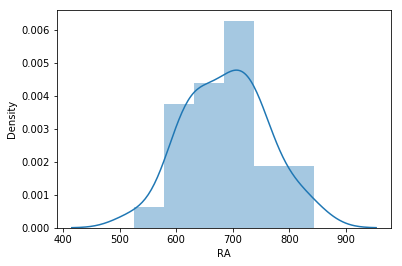

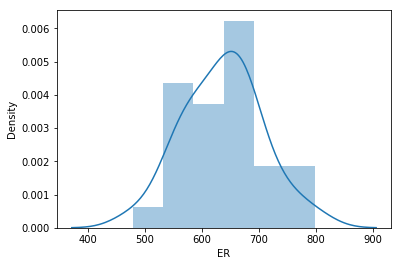

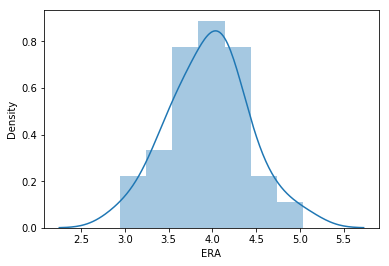

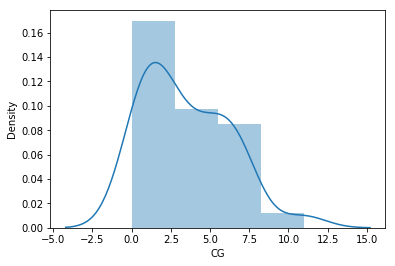

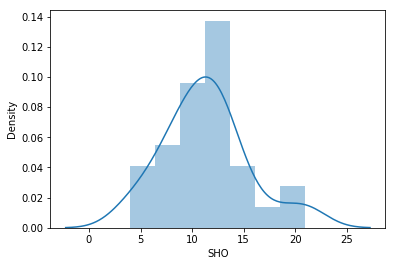

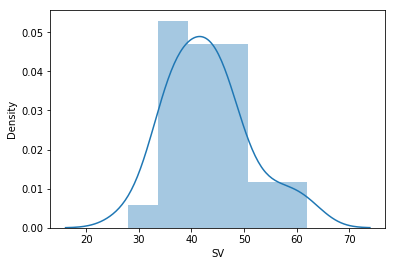

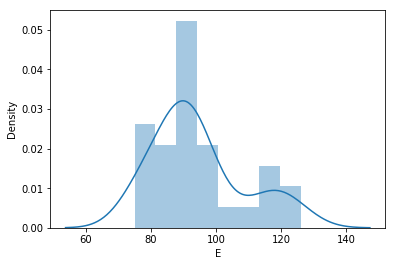

In [48]:
for i in df.columns:
    plt.subplots()
    sns.distplot(df[i],kde=True)

Most of the columns data appears to be normally distibuted. There is skewness to some extent which has to be treated.

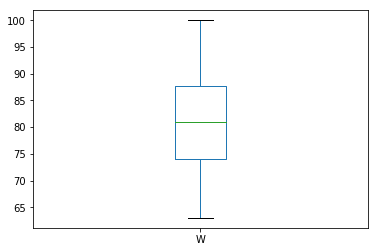

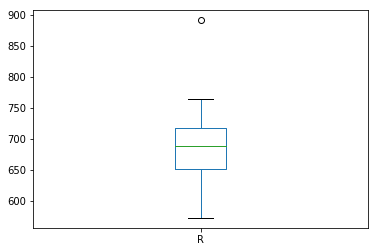

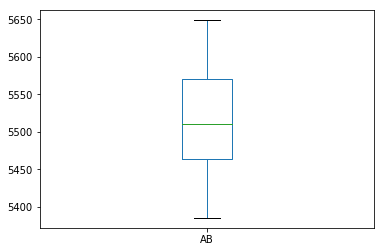

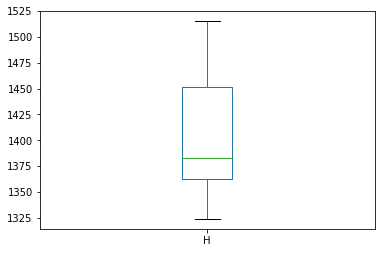

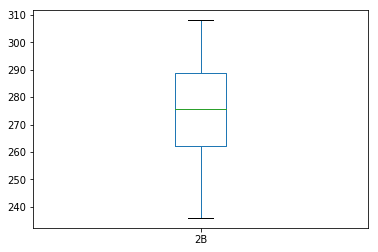

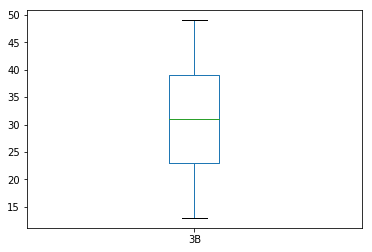

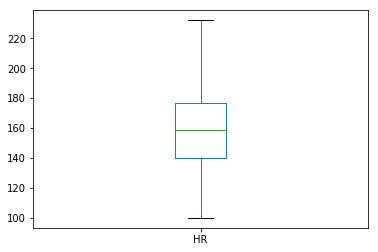

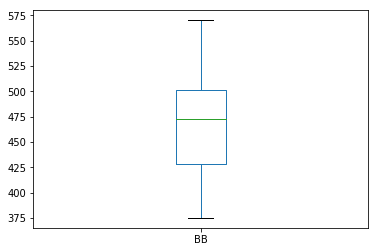

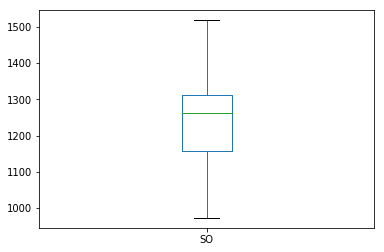

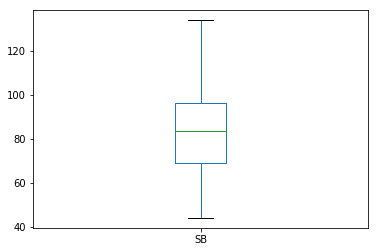

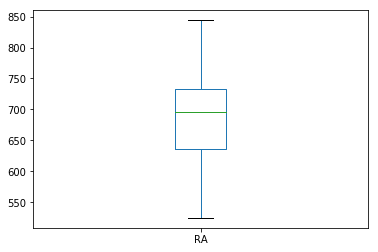

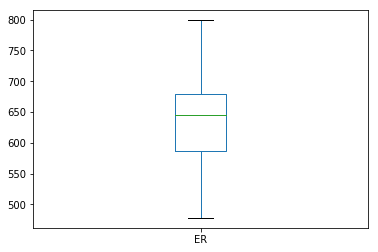

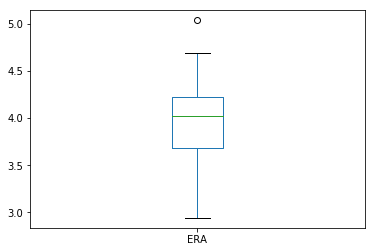

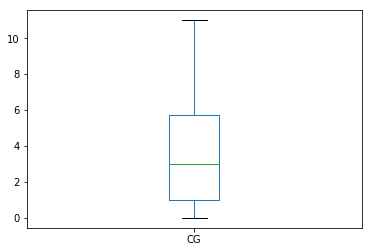

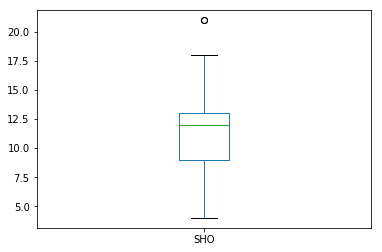

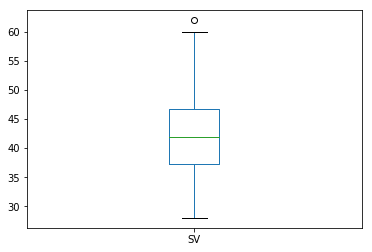

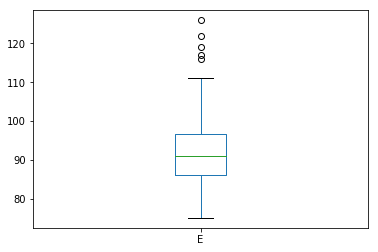

In [49]:
#Plot the boxplot of each of the columns to know if outliers are there
for i in df.columns:
    plt.subplots()
    df[i].plot.box()

Few outliers are present in columns 'E','SV','SHO','ERA','R'

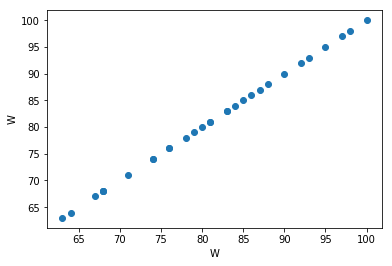

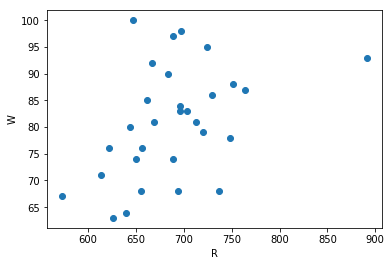

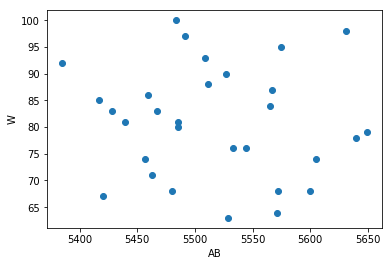

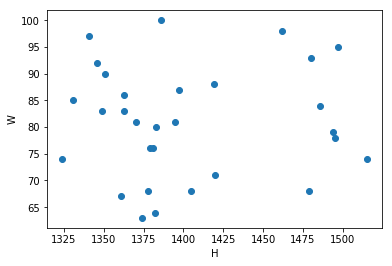

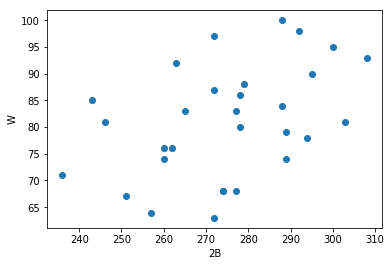

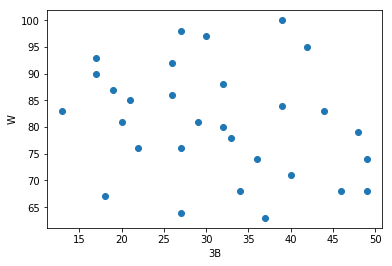

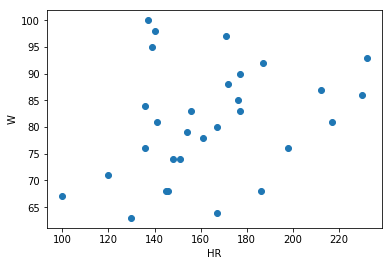

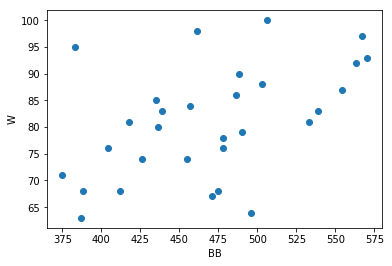

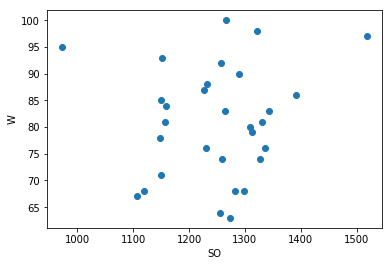

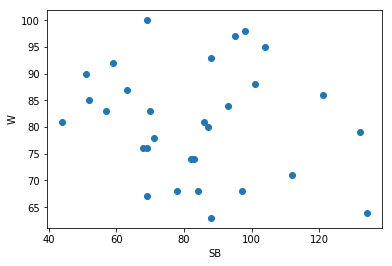

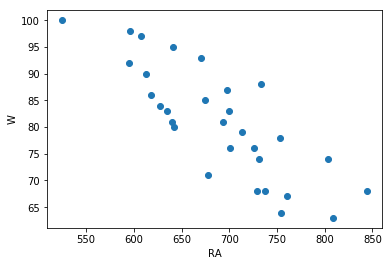

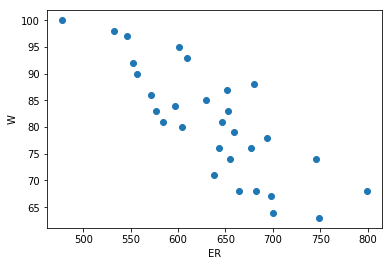

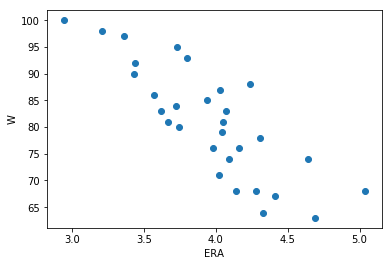

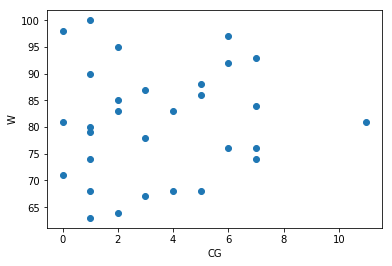

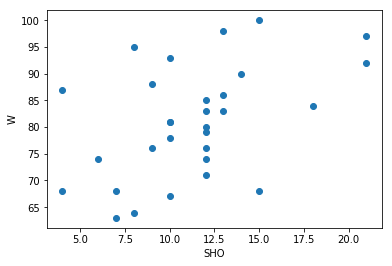

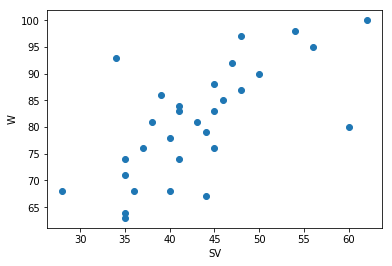

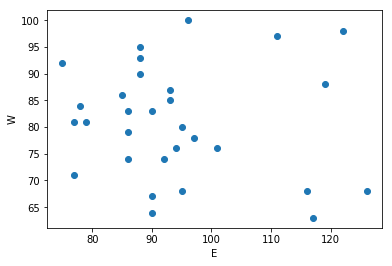

In [50]:
#plot scatter plots to know the relation between taget variable 'W' and each of the independent variables
for i in df.columns:
    plt.subplots()
    plt.scatter(x=df[i],y=df['W'])
    plt.xlabel(i)
    plt.ylabel('W')

There appears to be no clear linear relation between 'W' and 'E','SHO','CG','SB','SO','HR','3B','2B','H','AB','R'

'W' appears to increase with 'SV','BB'

'W' appears to decrease with 'ERA','ER','RA',

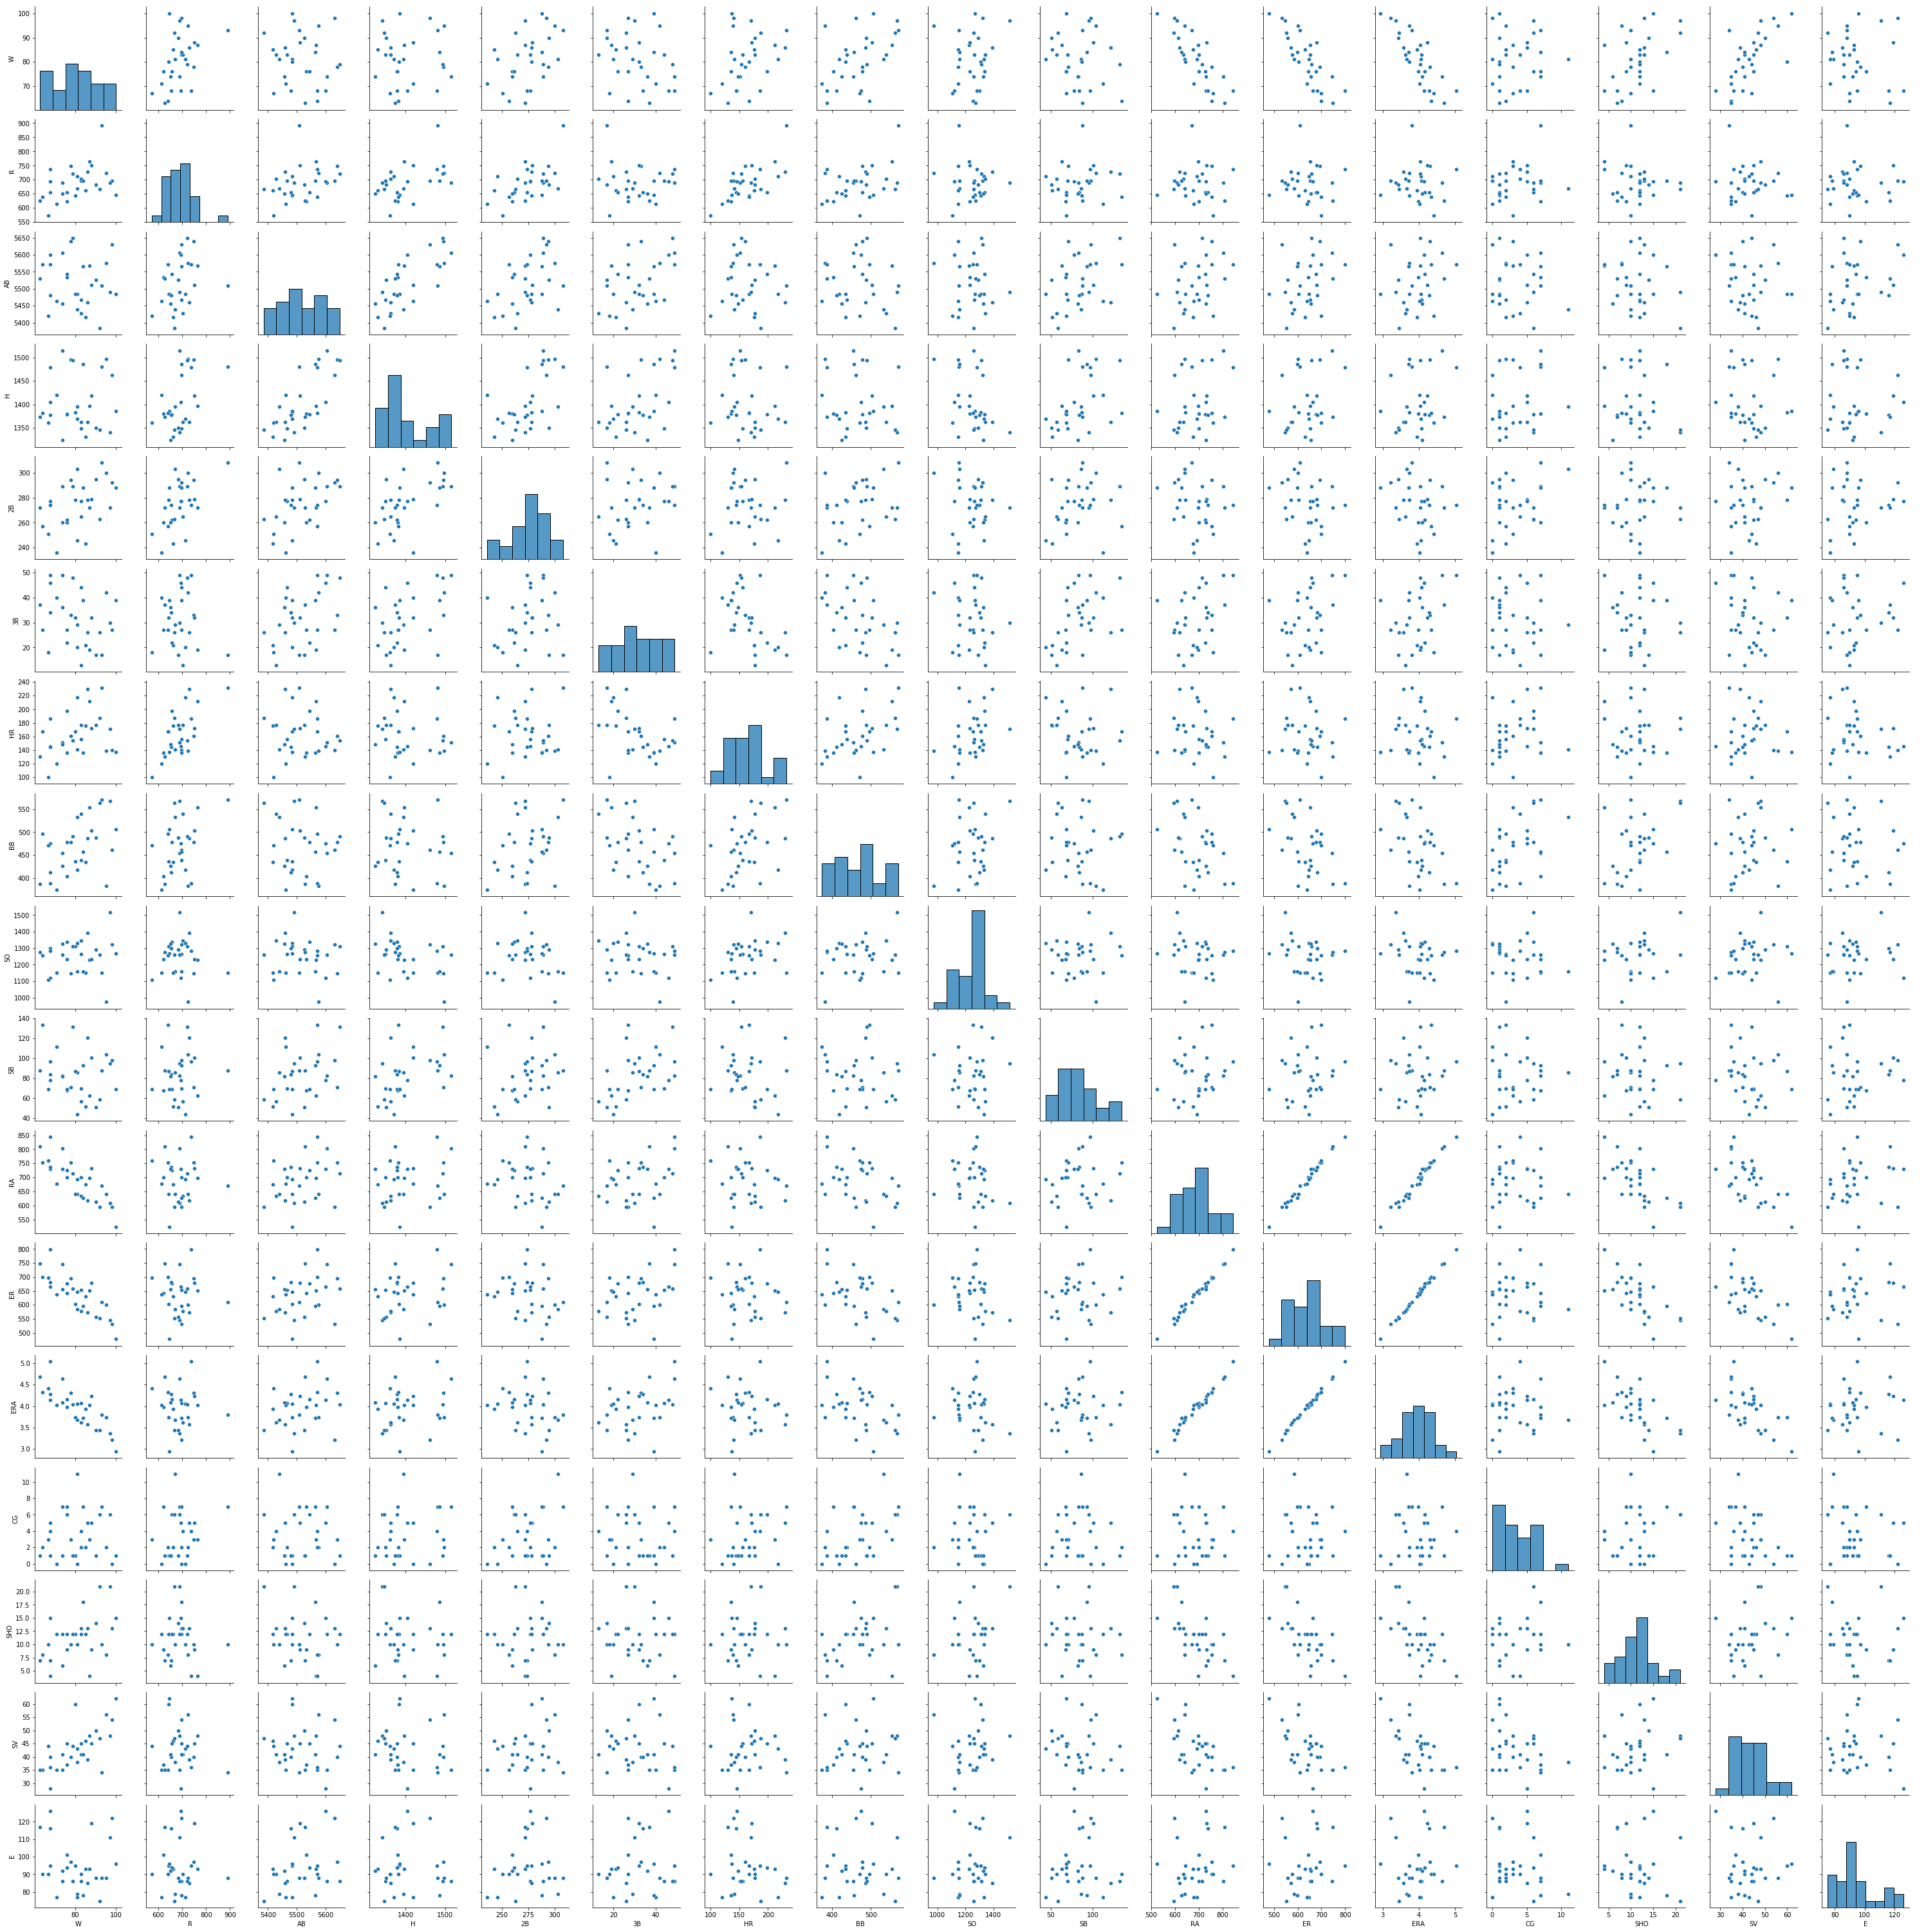

In [9]:
sns.pairplot(df)

In [51]:
#Describe the dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


It can be seen that there is variation in mean of different columns. So Scaling of all independent variables has to be done.

In [52]:
#Correlation of different columns with the target column
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


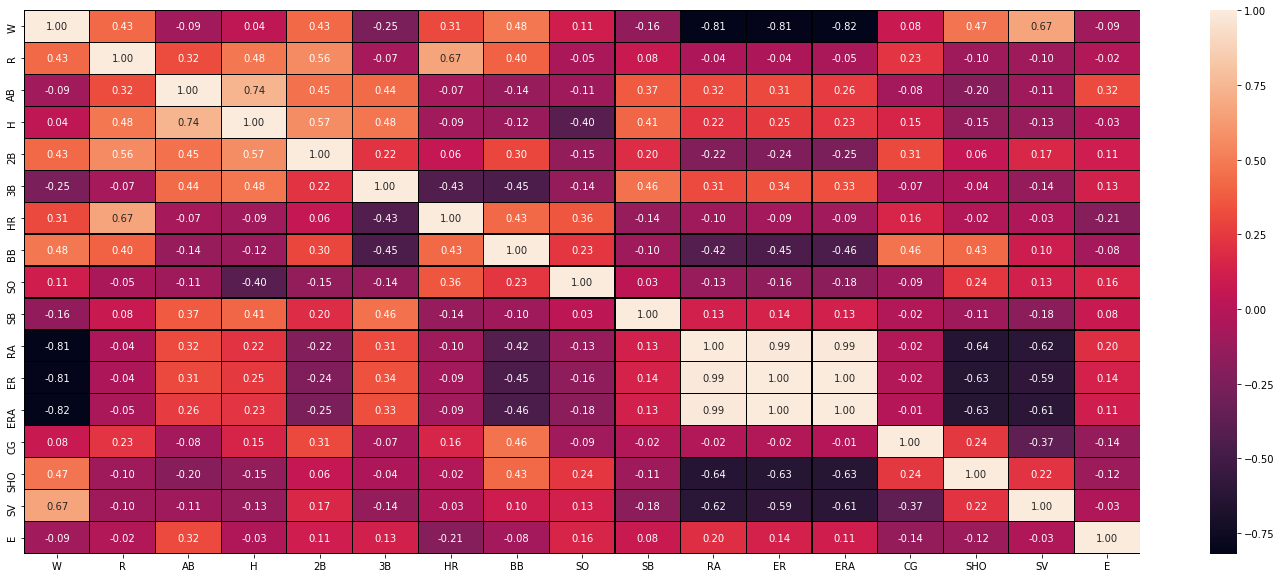

In [53]:
#Plot a heatmap of the correlation
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor='Black',fmt='0.2f')

Columns 'R','2B','HR','BB','SO','SHO','SV' have a good positive correlation with the target column 'W'.

Columns '3B','SB','RA','ER','ERA' have a good negative correlation with the target column 'W'

Columns 'AB','H','CG','E' have a weak correlation with the target column 'W'.

Max Correlation : 'ER', 'ERA','RA': -0.8
    
Min Correlation:  'H': 0.04, 'E':-0.09, 'CG':0.08, 'AB':-0.09
                    
There is high correlation among some independent variables. For e.g between 'ERA' and 'RA','ERA' and 'ER','RA' and 'ER'.
This indicates the presence of multicollinearity in the data which has to be removed. This can further be confirmed with VIF



Separating  the features and target column

# Data Cleaning

Though column 'H' has very low correlation with 'W', for now let us retain 'H'. Number of hits might have an effect on 'W'

# Outlier Removal

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [55]:
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


It can be seen that one row has been removed based on zscore which amounts to nearly 3% data loss.This is accepatable.

In [56]:
# Drop 'ER' column to treat multicollinearity
df_new.drop(columns='ER',axis=1,inplace=True)
df_new.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,4.64,7,12,35,86


# Checking for skewness and treatment

In [57]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Taking +/- 0.65 as threshold, columns 'H','CG','E' are found to be skewed.

In [59]:
li=['H','CG','E']
df1=df_new.loc[:,li]
col=df1.columns
from sklearn.preprocessing import power_transform
x=power_transform(df1,method='yeo-johnson')

In [61]:
df2=pd.DataFrame(x)
df2.columns=col

In [63]:
for k in li:
    df_new[k]=df2[k].values

In [66]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ERA    0.016693
CG    -0.045947
SHO    0.526943
SV     0.627480
E      0.065585
dtype: float64

In [67]:
#Separating the features and target column

#Splitting the dataframe into features columns and target column

x=df_new.drop(columns='W')
y=df_new['W']


In [68]:
x.shape

(29, 15)

In [69]:
y.shape

(29,)

In [70]:
df_new.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
count,29.000000,29.000000,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,2.900000e+01,29.000000,29.000000,2.900000e+01
mean,80.551724,681.241379,5516.517241,0.0,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,3.961724,3.120110e-16,11.344828,43.379310,1.188704e-12
std,10.384006,45.357040,71.701076,0.0,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,0.461148,1.017700e+00,4.185655,7.816712,1.017700e+00
min,63.000000,573.000000,5385.000000,0.0,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,2.940000,-1.732896e+00,4.000000,28.000000,-1.870191e+00
25%,74.000000,650.000000,5463.000000,0.0,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,3.670000,-8.706817e-01,9.000000,38.000000,-5.408198e-01
50%,81.000000,689.000000,5511.000000,0.0,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,4.030000,1.218706e-01,12.000000,43.000000,1.904854e-03
75%,87.000000,713.000000,5571.000000,0.0,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,4.240000,7.706490e-01,13.000000,47.000000,3.833856e-01
max,100.000000,764.000000,5649.000000,0.0,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,5.040000,2.011315e+00,21.000000,62.000000,1.810553e+00


Scaling is to be done

# Scaling

In [71]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(x)

In [73]:
X=pd.DataFrame(X)

In [74]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.959398,0.830084,0.0,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511388,-0.307098,-0.813262,1.643157,-0.348265
1,0.331147,-0.702831,0.0,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.238952,-0.307098,0.159299,0.211006,-0.540820
2,-0.274666,-1.100253,0.0,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.643801,2.011315,-0.326982,-0.700362,-1.326125
3,-1.329231,0.233951,0.0,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.040333,1.264463,-0.570122,-0.830557,0.650818
4,0.174084,1.255894,0.0,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.496876,1.264463,0.159299,-1.090948,-0.540820


# Fitting Models

# Linear Regression

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lir=LinearRegression()

In [76]:
#Find the best random state
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=i,test_size=0.2)
    lir.fit(x_train,y_train)
    pred_train=lir.predict(x_train)
    pred_test=lir.predict(x_test)
    if round(r2_score(y_train,pred_train),2)==round(r2_score(y_test,pred_test),2):
        print('At random state=',i,'model performs well')
        print('training accuracy is',r2_score(y_train,pred_train))
        print('testing accuracy is',r2_score(y_test,pred_test))
        

#if the training and testing accuracy are equal print the corresponding random state else skip
    

At random state= 133 model performs well
training accuracy is 0.9385269188617291
testing accuracy is 0.9449959264154801
At random state= 189 model performs well
training accuracy is 0.933069329473475
testing accuracy is 0.9315919999787068
At random state= 321 model performs well
training accuracy is 0.9406939612014331
testing accuracy is 0.9352032893471677
At random state= 397 model performs well
training accuracy is 0.9343156363269022
testing accuracy is 0.9328662921243325
At random state= 500 model performs well
training accuracy is 0.936818486390765
testing accuracy is 0.941842779951849


Take the random state as 133 for all the models to be fitted.

In [77]:
#Fit Linear regression with the found random state
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=133,test_size=0.2)
lir.fit(x_train,y_train)

LinearRegression()

In [78]:
#Find the coefficients and intecept
lir.coef_

array([ 6.60993383e+00, -1.78013604e+00, -5.32907052e-15, -1.25478603e+00,
       -2.55715510e-01, -2.03082762e+00, -2.56160104e+00,  2.96723785e-01,
        3.24868494e-01,  1.32115824e+01, -1.78580396e+01,  2.07944887e+00,
        2.15666022e+00,  5.20131738e+00, -8.67470501e-01])

In [79]:
lir.intercept_

80.55551849912418

In [80]:
#Predict target variable for testing data
pred=lir.predict(x_test)

In [81]:
#Find the different evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('r2Score:',r2_score(y_test,pred))

Mean absolute error: 1.975655765703851
Mean Squared error: 6.516454828832695
r2Score: 0.9449959264154801


Cross Validation of the Linear Regression Model

In [82]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lir,X,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is 0.1351611418860057 r2 score is 0.9449959264154801 and difference b/w thses two scores is  0.81


In [86]:
#Choose cv and list the mean cv score and accuracy

# Decision Tree regression

In [83]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [84]:
pred=dtr.predict(x_test)

In [85]:
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('r2Score:',r2_score(y_test,pred))

Mean absolute error: 7.5
Mean Squared error: 69.5
r2Score: 0.4133645955451348


Cross Validation

In [86]:
cv_score=cross_val_score(dtr,X,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is -1.9738229332642443 r2 score is 0.4133645955451348 and difference b/w thses two scores is  2.387


# KNeighbors Regressor

In [87]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)


KNeighborsRegressor()

In [88]:
pred=knr.predict(x_test)
print('r2Score:',r2_score(y_test,pred))

r2Score: 0.4608018757327078


Cross Validation

In [89]:
cv_score=cross_val_score(knr,X,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is -0.19880075750381737 r2 score is 0.4608018757327078 and difference b/w thses two scores is  0.66


# Support Vector Regressor

In [96]:
from sklearn.svm import SVR
svr=SVR(C=1.0,epsilon=0.2,kernel='linear')
svr.fit(x_train,y_train)
pred=svr.predict(x_test)


In [97]:
print('r2Score:',r2_score(y_test,pred))

r2Score: 0.7668301414779866


Cross Validation

In [98]:
cv_score=cross_val_score(svr,X,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is 0.35362967168385456 r2 score is 0.7668301414779866 and difference b/w thses two scores is  0.413


# Random Forest Regressor

In [99]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [100]:
pred=rfr.predict(x_test)
print('r2Score:',r2_score(y_test,pred))

r2Score: 0.5840835169988274


Cross Validation

In [101]:
cv_score=cross_val_score(rfr,X,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is -0.6152778152820956 r2 score is 0.5840835169988274 and difference b/w thses two scores is  1.199


Of the fitted models,Support Vector Regressor has the least difference between r2 score and cv score. So Support Vector Regressor is choosen.

# Hyper Parameter Tuning of Support Vector Regressor

In [103]:
from sklearn.model_selection import GridSearchCV
params={'C':[0.1,1,10,100],'kernel':['linear','poly','rbf','sigmoid'],'degree':[2,3,4,5],'gamma':[1,0.1,0.01,0.001],'epsilon':[0.1,0.2,0.3]}
model=SVR()
grid=GridSearchCV(estimator=model,param_grid=params,cv=5)
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)


0.39655289550961403
{'C': 10, 'degree': 2, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}


Fit the data with above parameters

In [104]:
svr=SVR(C=10,degree=2,epsilon=0.2,kernel='linear',gamma=1)
svr.fit(x_train,y_train)


SVR(C=10, degree=2, epsilon=0.2, gamma=1, kernel='linear')

In [105]:
pred=svr.predict(x_test)
print('r2Score:',r2_score(y_test,pred))

r2Score: 0.893762376198864


r2 Score has improved

In [106]:
cv_score=cross_val_score(svr,X,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is 0.39655289550961403 r2 score is 0.893762376198864 and difference b/w thses two scores is  0.497


# Saving the Model

In [107]:
import joblib
joblib.dump(svr,'svrfile.obj')
lir_from_joblib=joblib.load('svrfile.obj')
lir_from_joblib.predict(x_test)

array([84.71727431, 94.97155365, 63.99810551, 91.15388477, 74.60348584,
       78.62980897])

In [108]:
lir_from_joblib.score(x_test,y_test)

0.893762376198864